<a href="https://colab.research.google.com/github/HumorousOracle/CodeSoft/blob/main/codesoft03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name : Abhishek Bhimrao Patil**

**Domain : Data Science**

**Batch : August 24**

**Task 4 : Sales Prediction using Python**


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Load the dataset
df_sales = pd.read_csv('/content/advertising.csv')

In [5]:
df_sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


**Prepare the Data**

In [6]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df_sales.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
df_sales.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [10]:
df_sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
x = df_sales[['TV', 'Radio','Newspaper']]
y = df_sales['Sales']

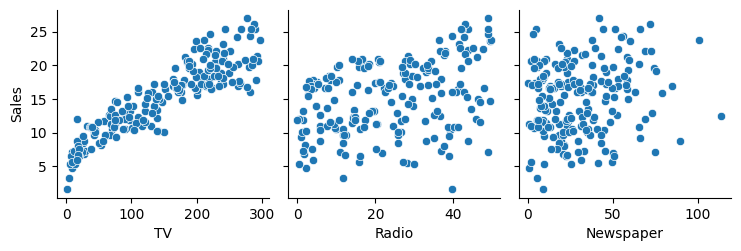

In [14]:
sns.pairplot(df_sales,x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = ['Sales'],kind = 'scatter')

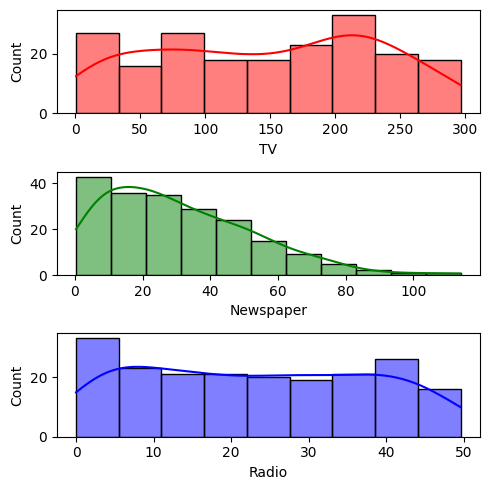

In [15]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.histplot(df_sales['TV'], color = 'red', kde = True, ax = axs[0])
plt2 = sns.histplot(df_sales['Newspaper'], color = 'green', kde = True, ax = axs[1])
plt3 = sns.histplot(df_sales['Radio'], color = 'blue', kde = True, ax = axs[2])
plt.tight_layout()

<Axes: >

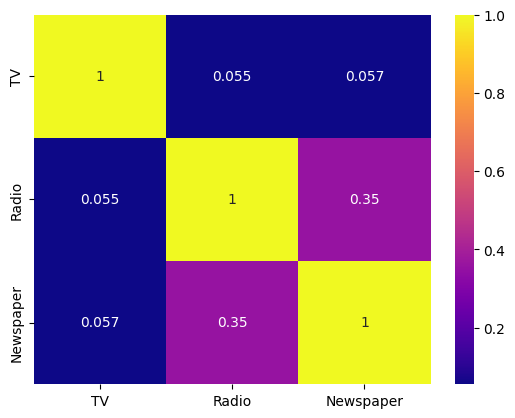

In [16]:
corr = df_sales[['TV','Radio','Newspaper']].corr()
sns.heatmap(corr,annot = True,cmap ='plasma')

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [23]:
# Train a Machine Learning Model

lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [24]:
#Accessing the Model
y_pred = lm.predict(x_test)
y_pred

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

In [25]:
y_test

,Sales
95,16.9
15,22.4
30,21.4
158,7.3
128,24.7
115,12.6
69,22.3
170,8.4
174,16.5
45,16.1


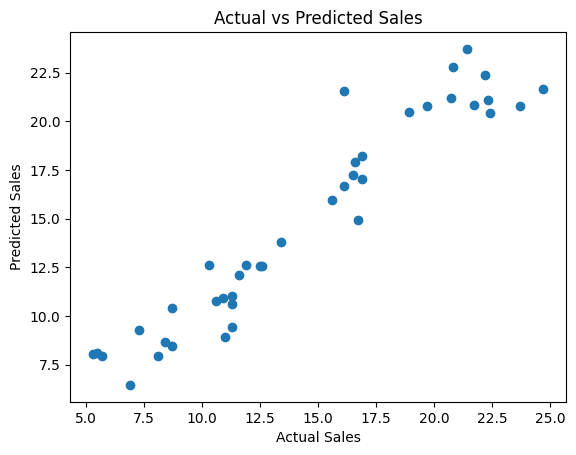

In [28]:
#Visualize the Results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()